In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt #Useful to include matplotlib when plotting with Seaborn, because Seaborn is built on it.

In [23]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


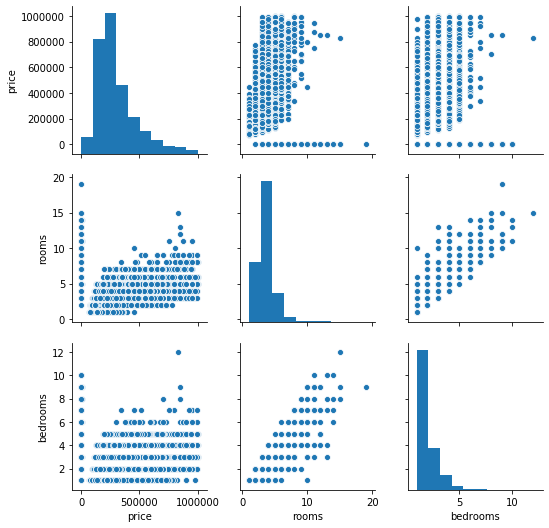

In [53]:
df_r_p_b= df[['price', 'rooms', 'bedrooms']]
sns.pairplot(df_r_p_b)
plt.show() #using Matplotlib to show the plot

In [47]:
df_subset = df[df["price"]>10000]

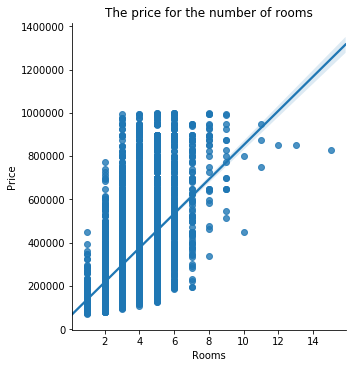

In [48]:
price = df_subset["price"]
rooms = df_subset["rooms"]

sns.lmplot(x="rooms", y="price", fit_reg=True, data=df_subset) #fit_reg=False leaves out the regression line; see below
plt.xlabel("Rooms") #use matplotlib to refine Seaborn plot
plt.ylabel("Price")
plt.title("The price for the number of rooms")
plt.show()

The relation is of the variables is somewhat linear. However, the distance from the line (the variation) seems to increase with a lager number of rooms.

In [49]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
print(pearsonr(df_subset['price'],df_subset['rooms']))
print(pearsonr(df_subset['price'],df_subset['bedrooms']))
print(pearsonr(df_subset['rooms'],df_subset['bedrooms']))

(0.540555973731477, 0.0)
(0.46860059441874413, 0.0)
(0.9152693100844891, 0.0)


There is a moderate correlation between the price and the rooms (r = 0.54) and the price and the bedrooms (r = 0.47). There is a strong correlation between the number of rooms and the number of bedrooms (r = 0.9). Which makes sense because if you have more bedrooms, you have more rooms. The correlation is highly significant because the P is 0,0, so it will be a very small number.